# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 15 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов
* Задача 5 &mdash; 30 баллов





-----

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

### <b><font color="blue">Легкая часть</font></b> 


## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [16]:
df = pd.read_csv("airquality.csv", sep=",")
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [17]:
stats = df.describe().applymap(lambda x: f"{x:0.2f}")
print(stats)

      Unnamed: 0   Ozone Solar.R    Wind    Temp   Month     Day
count     153.00  116.00  146.00  153.00  153.00  153.00  153.00
mean       77.00   42.13  185.93    9.96   77.88    6.99   15.80
std        44.31   32.99   90.06    3.52    9.47    1.42    8.86
min         1.00    1.00    7.00    1.70   56.00    5.00    1.00
25%        39.00   18.00  115.75    7.40   72.00    6.00    8.00
50%        77.00   31.50  205.00    9.70   79.00    7.00   16.00
75%       115.00   63.25  258.75   11.50   85.00    8.00   23.00
max       153.00  168.00  334.00   20.70   97.00    9.00   31.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** медиана подвержена влиянию выбросов куда меньше, чем среднее. Поскольку эти значения отличаются, но не сильно, мы понимаем, что выбросы есть, но их немного (в основном, по Озону)

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

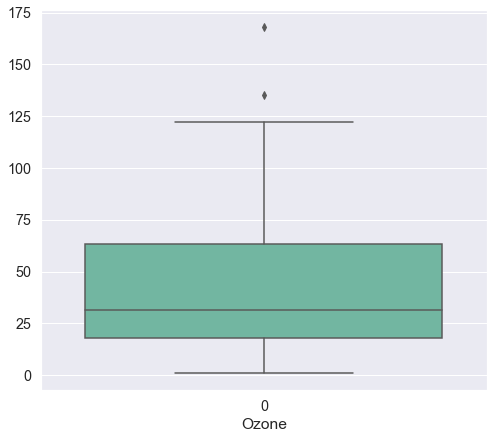

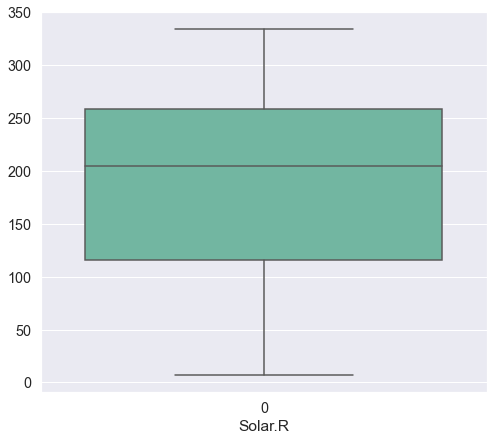

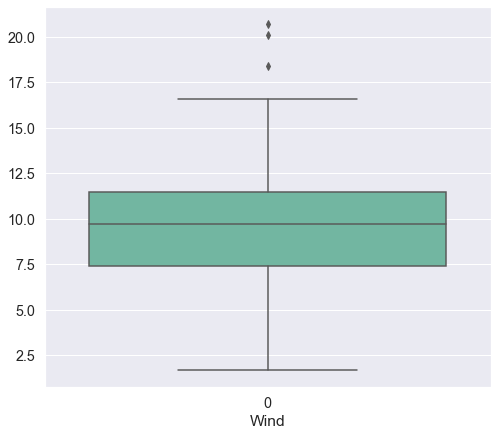

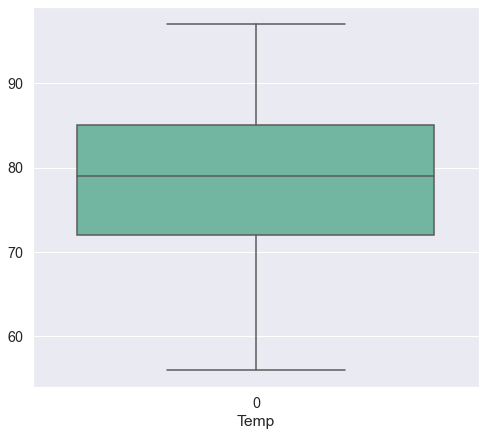

In [4]:
#plt.figure(figsize=(8, 7))
#sns.boxplot(data = df["Ozone"])

#sns.boxplot(x='day', y='tip', data=df["Ozone"], palette='Set3')

cols = ["Ozone", "Solar.R", "Wind", "Temp"]

for col in cols:
    plt.figure(figsize=(8, 7))
    sns.boxplot(data = df[col])
    plt.xlabel(col)
    plt.show()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** видимо, имеется 2-3 выброса

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

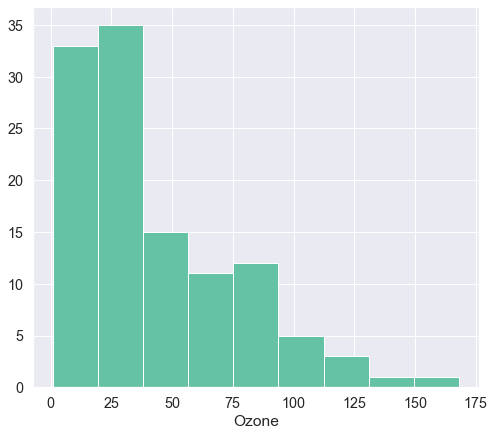

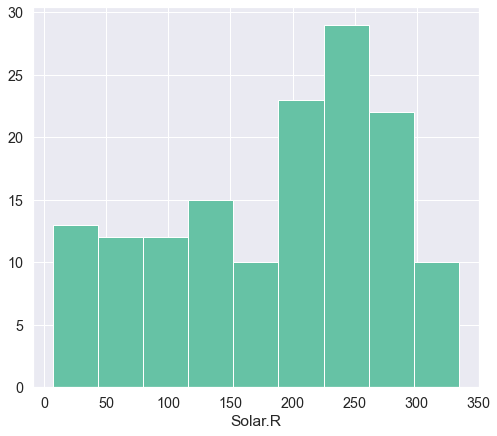

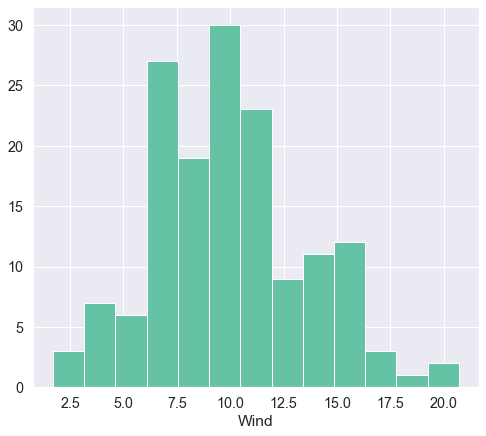

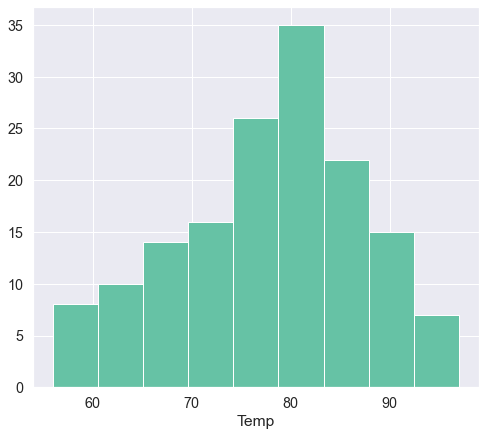

In [18]:
for col in cols:
    plt.figure(figsize=(8, 7))
    plt.hist(x = df[col],bins='auto')
    plt.xlabel(col)
    plt.show()

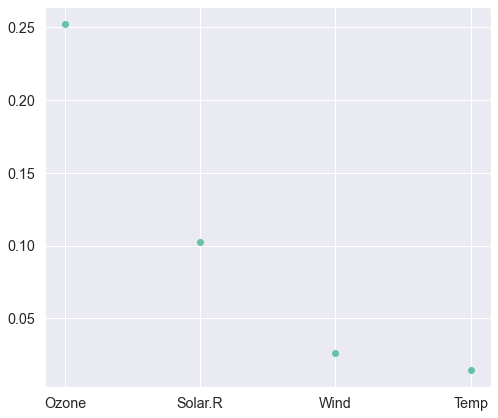

In [21]:
# выведем относительные разности среднего и медианы
diffs ={}
for col in cols:
    diffs[col] = np.abs((float(stats[col]["mean"]) - float(stats[col]["50%"])) / float(stats[col]["mean"]))

#print(diffs)

# построим график

plt.figure(figsize=(8, 7))
plt.scatter(diffs.keys(), diffs.values())
plt.show()

In [23]:
print("Параметр с наибольшим числом выбросов - это Wind")
print("Выборочное среднее: ", stats["Wind"]["mean"])
print("Выборочная медиана: ", stats["Wind"]["50%"])
print("Относительная разница:", round(np.abs(float(stats["Wind"]["mean"]) - float(stats["Wind"]["50%"]) ) / float(stats["Wind"]["mean"]),2) )

Параметр с наибольшим числом выбросов - это Wind
Выборочное среднее:  9.96
Выборочная медиана:  9.70
Относительная разница: 0.03


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Выбросов у измерений скорости ветра много потому, видимо, что это локально очень сильно флуктурирующий параметр.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** В случае ветра, вероятно, это действительно так. Характерное время изменения ветра много меньше периода в 1 сутки (период между наблюдениями).

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:** Коэффициент корреляции Пирсона?

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:** С помощью робастных статистик можно анализировать количество выбросов.

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

In [10]:
nums = list(map(str, range(1, 15)))
df = pd.read_csv("wine/wine.csv", sep = ",", names=nums)
df.head()
# первая строка - названия заголовков, поэтому делаем ее заголовками для удобства
df.columns = df.iloc[0]
df = df[1:]

# также  значения ячеек - строки (а не числа), и это помешает дальнейшему нормальному отображению графиков
# Поэтому конвертируем в числа

df = df.astype(float)

df.head()

In [7]:
stats = df.describe()
df.describe()

In [8]:
# чисто шоб посмотреть, построим гистограммки распределений
# Вино бывает разных типов, по условию, мы рассматриваем только первый. поэтому выбираем только нужные строчки из таблицы
nums_selected = ["Ash", "Nonflavanoid.phenols", "Proanth", "Hue"]
# выбрали интересующие нас столбцы
first_wine_df = df.loc[df['Wine'] == 1]
for col in nums_selected:
    plt.figure(figsize=(8, 7))
    plt.hist(x = first_wine_df[col], bins="auto")
    plt.xlabel(col)
    plt.show()

ну такие себе нормальные распределения.. но, видимо, с пивом покатит.

In [81]:
# теперь рассчитываем реальне и асимптотические ворота. Ставим, скажем, степень доверия 0.05, и составляем таблицу
# для каждого из параметров: нормальный и стьюдент. По сути, повторяем вычисление из последней задачи задания 3
n = len(df.index)
print("Number of degrees of freedom: ", n)
alpha = 0.05

delta_normal = - sps.norm.ppf(alpha/2, loc = 0, scale = 1)
print("Delta for normal distribution: ",delta_normal)

delta_student = - sps.t.ppf(alpha/2, loc = 0, scale = 1, df = n)
print("Delta for Student distribution: ", delta_student)

print("\n")


for col in nums_selected:
    # рассматриваем каждый из параметров для вина первого типа
    data = np.array(first_wine_df[col])
    print("Considering column: ", col)
    # используем несмещенную оценку дисперсии, чтобы не плодить ошибки
    S = np.sqrt(n / (n-1)) * np.std(data)
    theta = np.mean(data)
    print("Standard deviation (corrected): ", S)
    print("Shift parameter estimation: ", theta)
    
    # рассчитываем реальные доверительные интервалы
    int_normal = delta_normal * S / np.sqrt(n)
    int_student = delta_student * S / np.sqrt(n)

    print("Normal half-interval: ", int_normal)
    print("Student half-interval: ", int_student)
    print("Relative difference: ", np.abs(int_normal - int_student) / int_student)
    print("\n")

Number of degrees of freedom:  178
Delta for normal distribution:  1.9599639845400545
Delta for Student distribution:  1.9733808885447033


Considering column:  Ash
Standard deviation (corrected):  0.22586797359404254
Shift parameter estimation:  2.4555932203389834
Normal half-interval:  0.03318125020818808
Student half-interval:  0.033408391957888126
Relative difference:  0.006798942911899545


Considering column:  Nonflavanoid.phenols
Standard deviation (corrected):  0.06964898792316133
Shift parameter estimation:  0.29000000000000004
Normal half-interval:  0.010231820201208209
Student half-interval:  0.010301861972646499
Relative difference:  0.006798942911899299


Considering column:  Proanth
Standard deviation (corrected):  0.40975446772767
Shift parameter estimation:  1.8993220338983048
Normal half-interval:  0.06019518969976432
Student half-interval:  0.0606072549663273
Relative difference:  0.006798942911899275


Considering column:  Hue
Standard deviation (corrected):  0.11581

Сделайте выводы по полученной таблице.

**Вывод:** Ну почти никак разница не ощущается на выборке размера 150-200. На выборках поменьше, видимо, критично.

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

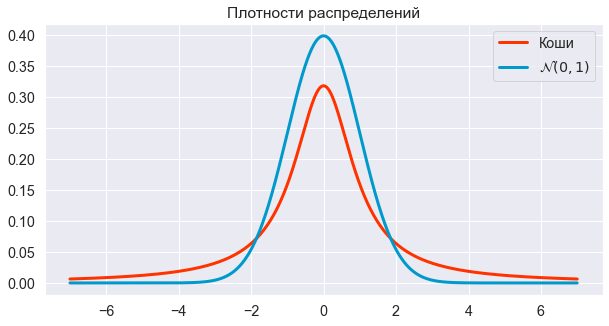

In [76]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [77]:
size = 30
num = int(10e5)

samples = np.zeros(shape = (num, size))
print(num)
for i in range(num):
    samples[i] = sps.norm().rvs(size = size)

1000000


По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

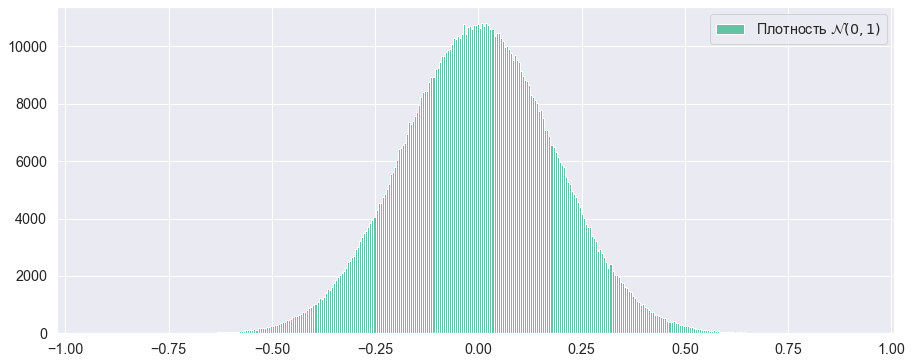

In [123]:
means = np.zeros(num)
for i in range(num):
    means[i] = np.mean(samples[i])

plt.figure(figsize=(15,6))
plt.hist(means, bins = 100, label='Плотность $\\mathcal{N}(0,1)$')
#sns.distplot(means, bins = "auto")
grid = np.linspace(-1, 1, 1000)
#plt.plot(grid, sps.norm.pdf(grid), color = "blue")
plt.legend()
plt.show()

**Вывод:** ЦПТ действительно работает.

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [1]:
size = 30
num = int(10e5)
means = np.zeros(num)
samples = np.zeros(shape = (num, size))
print(num)
for i in range(num):
    if i % 10e4 == 0:
        print(i/num)
    samples[i] = sps.cauchy().rvs(size = size)
    means[i] = np.mean(samples[i])

Построим аналогичный график. 

In [ ]:
means = np.zeros(num)
for i in range(num):
    means[i] = np.mean(samples[i])

plt.figure(figsize=(15,6))
plt.hist(means, bins = "auto", label='Плотность $\\mathcal{N}(0,1)$')
#sns.distplot(means, bins = "auto")
grid = np.linspace(-1, 1, 1000)
plt.plot(grid, sps.cauchy().pdf(grid), color = "blue")
plt.legend()
plt.show()

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:** 


### <b><font color="orange">Сложная часть</font></b>

## Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборки из равномерного распределения $U[0, \theta]$.


1. Постройте асимптотический доверительный интервал для $\theta$, используя асимптотически нормальную оценку $\theta$.




**Ответ:**

2. Постройте точный доверительный интервал для $\theta$, используя статистику $X_{(n)}$.

    - Найдите функцию распредления $X_{(n)}$ по определению. 
    - Точный доверительный интервал для $\theta$ имеет смысл строить в виде $(X_{(n)}, X_{(n)} + c_{\alpha})$ (поясните почему). 
    - Нужно найти такое $c_{\alpha}$, что $\mathsf{P_{\theta}}(\theta \in (X_{(n)}, X_{(n)} + c_{\alpha})) = \alpha$ 

**Ответ:**

Визуализируйте интервалы. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию. Нужно нанести на график точки выборки.

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

In [ ]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None, 
    ylim=(None, None), 
    estim_label = '',
    sample_label='',
    color=None,
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''
    
    
    # ваш код

**Решение:**

In [ ]:
# ваш код

**Вывод:**


## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

In [ ]:
plt.figure(figsize=(15,6))

grid = np.linspace(-7, 7, 10000)

plt.plot(sps.norm().pdf(grid), label="Normal")
plt.plot(sps.cauchy().pdf(grid), label="Cauchy")

plt.legend()
plt.show()

**Вывод:** У Коши более тяжелые хвосты, чем у нормального распределения.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:**<...>

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям. 

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.


**Решение:**

In [ ]:
n = 1000
sample = pdf.

**Вывод:** <...>